### Importing Libraries and Modules

The cell imports several essential Python libraries for data analysis and visualization:

- `os`: A module to use Operative System functionalities
- `pandas`: A powerful data manipulation and analysis library providing data structures and operations for manipulating numerical tables and time series.
- `matplotlib.pyplot`: A module in matplotlib for plotting graphs.
- `datetime`: Module to get current timestamp.

In [95]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

### Plot_metric function

This function is used to plot a single metric, given the matrices.
Parameters:
- `data`: Collection containing the matrices data frames.
- `metric_func`: Function to get the correct metrics from the data frames.
- `ylabel`: Y axis label.
- `out_path`: Path to save the plot to.

In [96]:
def plot_metric(data, metric_func, ylabel, out_file):
    plt.figure(
        figsize=(10, 6),
        layout="tight"
    )

    matrices = []

    for filename, df in data.items():
        y = metric_func(df)
        x = range(len(y))

        if len(df['matrixName']) > len(matrices):
            matrices = df['matrixName']

        plt.plot(x, y, marker='o', label=filename)

    plt.xticks(
        range(len(matrices)),
        matrices,
        rotation=-45,
        verticalalignment='top',
        horizontalalignment='left',
    )

    plt.xlabel("Matrices")
    plt.ylabel(ylabel)
    plt.yscale("log")
    plt.title(f"{ylabel} vs Dimension")
    plt.legend()
    plt.grid(True)
    
    plt.savefig(out_file, format="png")
    plt.show()

### Reading data from files
This section of code is needed to save the logs into dataframes.
For each file a dataframe is created and its entries are ordered by the number of non zeros. 

`input_folder` specifies the path to the folder containing the log files.

`output_folder` specifies the path to the folder where plots will be saved.

In [97]:
input_folder = "../runs/"
output_folder = "../output_plots/"

data_per_file = {}

for filename in os.listdir(input_folder):
    if filename.endswith(".csv"):
        filepath = os.path.join(input_folder, filename)
        try:
            df = pd.read_csv(filepath)
            df.sort_values(by="nonZeros")
            data_per_file[filename] = df
        except Exception as e:
            print(f"Error reading {filename}: {e}")

os.makedirs(output_folder, exist_ok=True)

### Total time plot

Using the sum of load time, decomposition time and solving time.

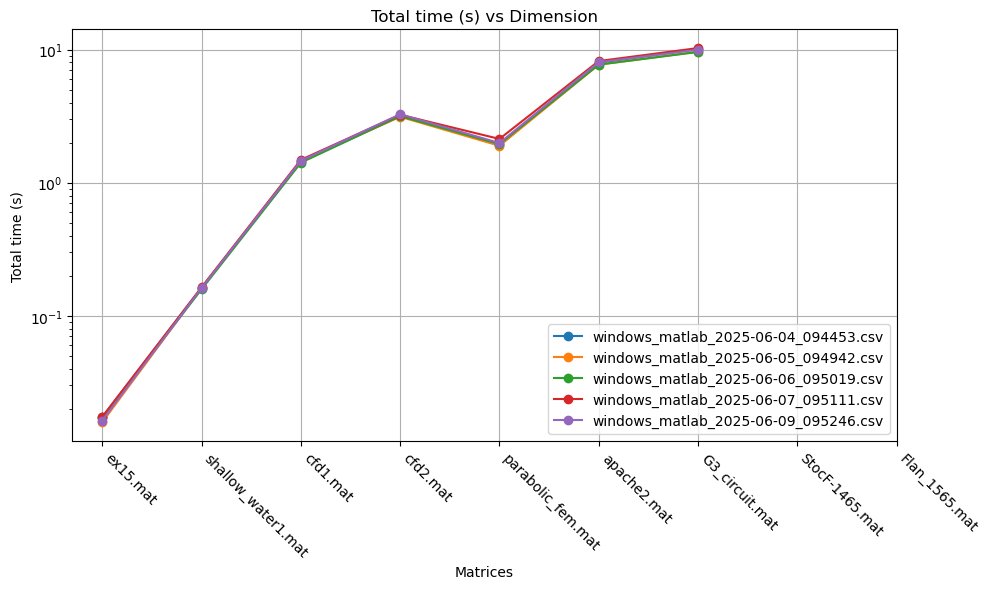

In [98]:
plot_metric(
    data_per_file,
    lambda df: df["loadTime"] + df["decompTime"] + df["solveTime"],
    "Total time (s)",
    output_folder + "tot_time_" + datetime.now().strftime("%y-%m-%d_%H-%M-%S") + ".png"
)

### Memory usage plot

Using the maximum between load memory, decomposition memory and solve memory.

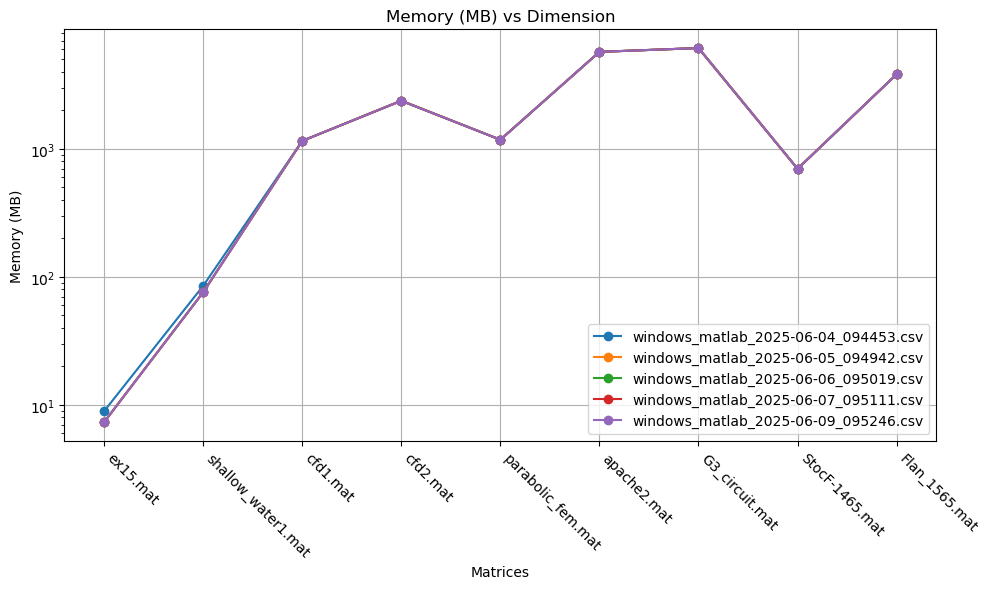

In [99]:
plot_metric(
    data_per_file,
    lambda df: df[["loadMem", "decompMem", "solveMem"]].max(axis=1),
    "Memory (MB)",
    output_folder + "memory_" + datetime.now().strftime("%y-%m-%d_%H-%M-%S") + ".png"
)

### Relative error plot

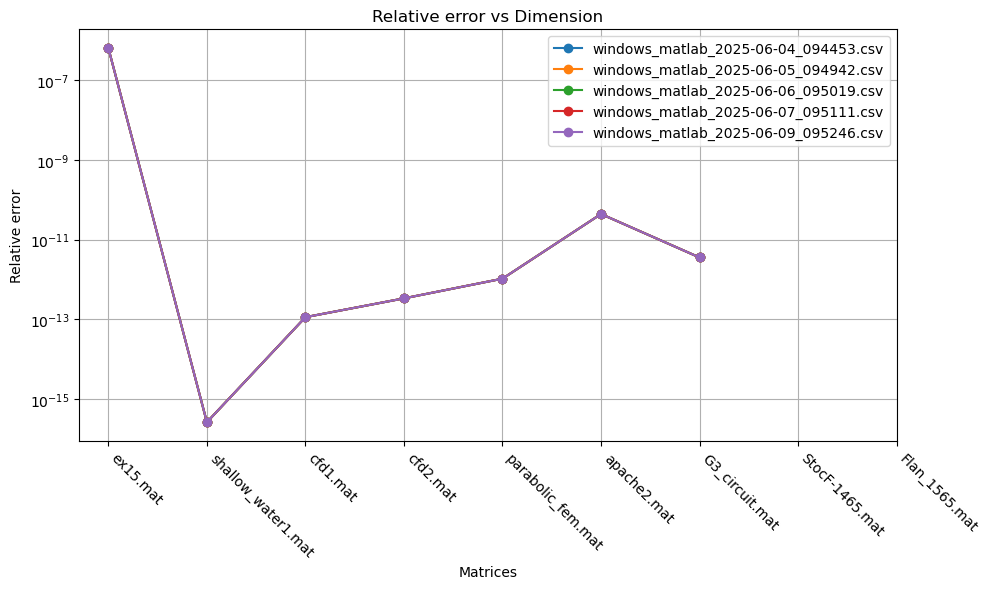

In [100]:
plot_metric(
    data_per_file,
    lambda df: df["relativeError"],
    "Relative error",
    output_folder + "rel_error_" + datetime.now().strftime("%y-%m-%d_%H-%M-%S") + ".png"
)
